
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="https://drive.google.com/uc?id=1yaj1_Ok9ua42Qqk5N-DLN2rNklmX7Jf9" style="width:50%;" width=800 height=300>

> <small>Image credits: Health Services Agency (HSA) via [image](http://www.schsa.org/publichealth/pages/corona-virus/img/corona-graphic.png)</smaal>

**COVID-19**

COVID-19 is an infectious disease caused by SARS-CoV-2 virus [[1]](https://en.wikipedia.org/wiki/Coronavirus_disease_2019). It began in Wuhan, China and spread across the whole world. The pandemic, COVID-19 outbreak is having a severe impact on our society. USA has most cases with Californa one of the worst affected states. This notebook tries to visualize COVID-19 cases in-depth considering various factors affecting/influencing the increase in the spread.  

<h2><b>Importing DataSets</b></h2>

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
covid_line_list = drive.CreateFile({'id': '1hQ2SczsPt8enskbGNn9-1XBi8cQJDn-1'})
covid_open_line_list = drive.CreateFile({'id': '1idiX3ijRbC1LtM0e0QW3cKcZaZHig_Ev'})
covid_clean = drive.CreateFile({'id': '1EUA8YOtYFdemOXhml4c33oY_eW-RI9Eh'})
covid_19_data = drive.CreateFile({'id': '1fUcIr0_sVsStVfK-emziZ_CZLalGOaOF'})
ca_county = drive.CreateFile({'id': '13lm7WvCD4xkN9mQJHhC4wzW0Cv2LqJ-E'})

In [269]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
covid_line_list.GetContentFile('COVID_line_list_data.csv')
covid_19_data_df = pd.read_csv('COVID_line_list_data.csv')

covid_open_line_list.GetContentFile('COVID_open_line_list.csv')
covid_19_data_open_df = pd.read_csv('COVID_open_line_list.csv')

covid_clean.GetContentFile('covid_19_clean_complete.csv')
covid_19_clean = pd.read_csv('covid_19_clean_complete.csv')

covid_19_data.GetContentFile('covid_19_clean_data.csv')
covid_19_data = pd.read_csv('covid_19_clean_data.csv')

ca_county.GetContentFile('CAPopulation.csv')
ca_county = pd.read_csv('CAPopulation.csv')
print("CAPopulation.csv is generated based on information available on website: https://worldpopulationreview.com/us-counties/ca/")

CAPopulation.csv is generated based on information available on website: https://worldpopulationreview.com/us-counties/ca/


In [270]:
covid_19_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
covid_19_country = covid_19_country.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis=1)
covid_19_country.head(2)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Australia,2020-04-29 18:32:26,-25.0000,133.0000,6746,90,5670,986,26.496777
1,Austria,2020-04-29 18:32:26,47.5162,14.5501,15402,580,12779,2043,171.011725


<h2><b>Preprocessing</b></h2>

In [0]:
covid_19_country = covid_19_country.rename(columns={"Country_Region": "country"})
covid_19_country["Active"] = covid_19_country["Confirmed"]-covid_19_country["Recovered"]-covid_19_country["Deaths"]

In [0]:
# Changing the conuntry names as per pycountry_convert
covid_19_country.loc[covid_19_country['country'] == "US", "country"] = "USA"
covid_19_country.loc[covid_19_country['country'] == "Korea, South", "country"] = "South Korea"
covid_19_country.loc[covid_19_country['country'] == "Taiwan*", "country"] = "Taiwan"
covid_19_country.loc[covid_19_country['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
covid_19_country.loc[covid_19_country['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
covid_19_country.loc[covid_19_country['country'] == "Reunion", "country"] = "Réunion"
covid_19_country.loc[covid_19_country['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
covid_19_country.loc[covid_19_country['country'] == "Bahamas, The", "country"] = "Bahamas"
covid_19_country.loc[covid_19_country['country'] == "Gambia, The", "country"] = "Gambia"

countries1 = np.asarray(covid_19_country["country"])


In [273]:
covid_19_country.head(2)

,country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Australia,2020-04-29 18:32:26,-25.0000,133.0000,6746,90,5670,986,26.496777
1,Austria,2020-04-29 18:32:26,47.5162,14.5501,15402,580,12779,2043,171.011725


In [0]:
df_countries_cases = covid_19_country.copy().drop(['Lat','Long_','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)
df_countries_cases.fillna(0,inplace=True)

<h2><b>World Wide Analysis</b></h2>

**Country Wide Reported Cases**

In [275]:
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
country,,,,,,
USA,1028217,59446,116776,851995,312.085653,5.780000
Spain,236899,24275,132929,79695,506.683990,10.250000
Italy,203591,27682,71252,104657,336.726505,13.600000
France,169053,23694,47775,97584,258.991733,14.020000
United Kingdom,166440,26166,847,139427,245.175721,15.720000
Germany,160943,6376,120400,34167,192.092888,3.960000
Turkey,117589,3081,44022,70486,139.424118,2.620000
Russia,99399,972,10286,88141,68.112083,0.980000
Iran,93657,5957,73791,13909,111.505783,6.360000


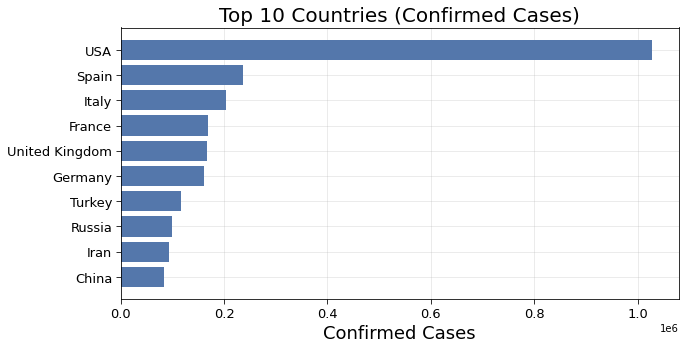

In [276]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="#5477ab")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

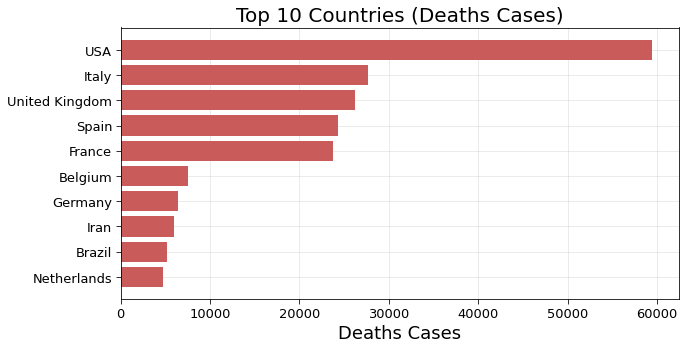

In [277]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="#c95b5b")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

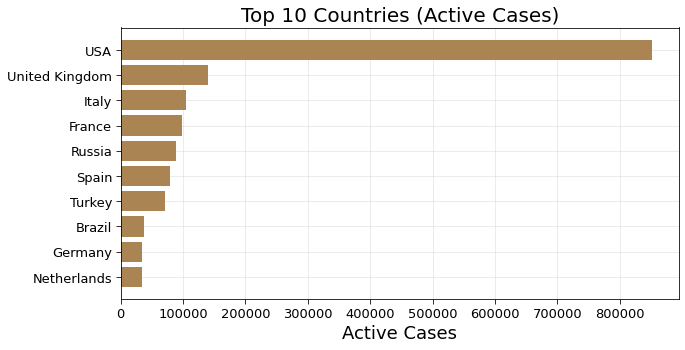

In [278]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active')["Active"].index[-10:],df_countries_cases.sort_values('Active')["Active"].values[-10:],color="#ab8454")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

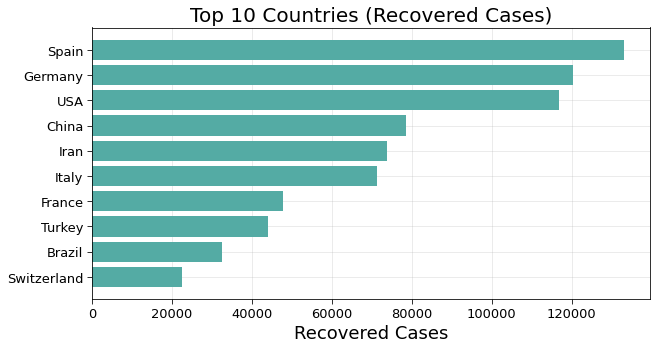

In [279]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="#54aba4")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

**Country Wise Correlation Analysis**

In [280]:
df_countries_cases.iloc[:,:].corr().style.background_gradient(cmap='Blues')

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
Confirmed,1.000000,0.928428,0.717419,0.977514,0.180235,0.159726
Deaths,0.928428,1.000000,0.717455,0.880402,0.222480,0.291885
Recovered,0.717419,0.717455,1.000000,0.556124,0.210219,0.188274
Active,0.977514,0.880402,0.556124,1.000000,0.147841,0.122030
Incident_Rate,0.180235,0.222480,0.210219,0.147841,1.000000,0.094990
Mortality Rate (per 100),0.159726,0.291885,0.188274,0.122030,0.094990,1.000000


<h2><b>US Analysis</b></h2>

In [281]:
covid_19_clean.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0


In [0]:
covid_19_clean.rename(columns={'ObservationDate': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Last Update':'last_updated',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

In [0]:
# cases 
cases = ['confirmed', 'deaths', 'recovered', 'active']

# Active Case = confirmed - deaths - recovered
covid_19_clean['active'] = covid_19_clean['confirmed'] - covid_19_clean['deaths'] - covid_19_clean['recovered']

# replacing Mainland china with just China
covid_19_clean['country'] = covid_19_clean['country'].replace('Mainland China', 'China')

# filling missing values 
covid_19_clean[['state']] = covid_19_clean[['state']].fillna('')
covid_19_clean[cases] = covid_19_clean[cases].fillna(0)
covid_19_clean.rename(columns={'Date':'date'}, inplace=True)

In [284]:
import plotly.express as px

formated_gdf = covid_19_clean.groupby(['date', 'country'])['confirmed', 'deaths', 'active', 'recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['date'] = pd.to_datetime(formated_gdf['date'])
formated_gdf['date'] = formated_gdf['date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['confirmed'].pow(0.3) * 5

fig = px.scatter_geo(formated_gdf, locations="country", locationmode='country names', 
                     color="confirmed", size='size', hover_name="country", 
                     range_color= [0, 5000], 
                     projection="natural earth", animation_frame="date", scope="north america",
                     title='Spread Over time in the North American continent', color_continuous_scale="portland", height=800)
# fig.update(layout_coloraxis_showscale=False)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [285]:
covid_19_data.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [286]:
# US state code to name mapping
state_map_dict = {'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'D.C.': 'District of Columbia',
 'FM': 'Federated States of Micronesia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'}

state_code_dict = {v:k for k, v in state_map_dict.items()}
state_code_dict["Chicago"] = 'Illinois'

def correct_state_names(x):
    try:
        return state_map_dict[x.split(",")[-1].strip()]
    except:
        return x.strip()
    
def get_state_codes(x):
    try:
        return state_code_dict[x]
    except:
        return "Others"

us_covid_df = covid_19_data[covid_19_data["Country/Region"]=="US"]
us_covid_df["Province/State"] = us_covid_df["Province/State"].apply(correct_state_names)
us_covid_df["StateCode"] = us_covid_df["Province/State"].apply(lambda x: get_state_codes(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
import datetime
import plotly.graph_objs as go

cumulative_df = us_covid_df.groupby(["StateCode", "ObservationDate"])["Confirmed", "Deaths", "Recovered"].sum().reset_index()
cumulative_df["ObservationDate"] = pd.to_datetime(cumulative_df["ObservationDate"] , format="%m/%d/%Y").dt.date
cumulative_df = cumulative_df.sort_values(by="ObservationDate").reset_index(drop=True)
start_date = datetime.date(2020, 2, 25)
cumulative_df = cumulative_df[cumulative_df["ObservationDate"]>=start_date]
cumulative_df["ObservationDate"] = cumulative_df["ObservationDate"].astype(str)

fig = px.choropleth(locations=cumulative_df["StateCode"],
                    color=cumulative_df["Confirmed"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=cumulative_df["ObservationDate"],
                    color_continuous_scale='Reds',
                    range_color=[0,55000]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Heatmap of COVID-19 cases in US states overtime",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<h2><b>US County-wise Analysis</b></h2>

In [0]:
covid_county_df= pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv",index_col=[0], parse_dates=[0])

In [289]:
covid_county_df.head(3)

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0


In [290]:
covid_county_latest_df = covid_county_df.groupby('county')['cases', 'deaths'].max().reset_index()

fig = px.bar(covid_county_latest_df.sort_values('cases', ascending=False)[:15][::-1], 
             x='cases', y='county', color_discrete_sequence=['#5477ab'],
             title='Top 10 USA Counties (Cases)', text='cases', orientation='h')
fig.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [291]:
california = covid_county_df[covid_county_df['state'] == "California"]
california.head(3)

,county,state,fips,cases,deaths
date,,,,,
2020-01-25,Orange,California,6059.0,1,0
2020-01-26,Los Angeles,California,6037.0,1,0
2020-01-26,Orange,California,6059.0,1,0


In [292]:
california_latest = california.groupby('county')['cases', 'deaths'].max().reset_index()

fig = px.bar(california_latest.sort_values('cases', ascending=False)[:10][::-1], 
             x='cases', y='county', color_discrete_sequence=['#5477ab'],
             title='Top 10 California Counties (Cases)', text='cases', orientation='h')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [293]:
california_latest = california.groupby('county')['cases', 'deaths'].max().reset_index()

fig = px.bar(california_latest.sort_values('deaths', ascending=False)[:10][::-1], 
             x='deaths', y='county', color_discrete_sequence=['#c95b5b'],
             title='Top 10 California Counties (Deaths)', text='deaths', orientation='h')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [294]:
california_latest.head(3)

,county,cases,deaths
0,Alameda,1554,59
1,Alpine,2,0
2,Amador,7,0


In [295]:
ca_county.rename(columns={"County": "county", "Population": "population"}, inplace = True)
ca_county.head()

,county,population
0,Los Angeles,10105518
1,San Diego,3343364
2,Orange,3185968
3,Riverside,2450758
4,San Bernardino,2171603


In [296]:
california_latest = pd.merge(california_latest, ca_county,how='left', on='county')
california_latest.head(3)

,county,cases,deaths,population
0,Alameda,1554,59,1666753.0
1,Alpine,2,0,1101.0
2,Amador,7,0,39383.0


In [0]:
california_latest['n_cases'] = (california_latest['cases']/california_latest['population'])*100

In [0]:
california_latest['n_deaths'] = (california_latest['deaths']/california_latest['population'])*100

In [299]:
fig = px.bar(california_latest.sort_values('n_cases', ascending=False)[:10][::-1], 
             x='n_cases', y='county', color_discrete_sequence=['#5477ab'],
             title='Top 10 California Counties after normlization (Cases)', text='n_cases', orientation='h')
fig.show()

In [300]:
fig = px.bar(california_latest.sort_values('n_deaths', ascending=False)[:10][::-1], 
             x='n_deaths', y='county', color_discrete_sequence=['#c95b5b'],
             title='Top 10 California Counties after normlization (Deaths)', text='n_deaths', orientation='h')
fig.show()

After normalizing with population, we see variation in the Top counties and provides better insight as it compares percentage of population

<h2><b>Covid-19 Growth Factors</b></h2>

In [301]:
california_latest.head(3)

,county,cases,deaths,population,n_cases,n_deaths
0,Alameda,1554,59,1666753.0,0.093235,0.00354
1,Alpine,2,0,1101.0,0.181653,0.00000
2,Amador,7,0,39383.0,0.017774,0.00000


In [302]:
covid_19_data_df.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
covid_19_data_df = covid_19_data_df.drop(columns=['Unnamed: 3','Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'])

In [304]:
covid_19_data_df.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...


In [305]:
covid_19_data_open_df.head(2)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
covid_19_data_open_df = covid_19_data_open_df.drop(columns=['Unnamed: 33','Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [307]:
covid_19_data_df['reporting date'] = pd.to_datetime(covid_19_data_df['reporting date'])
covid_19_data_df['exposure_start'] = pd.to_datetime(covid_19_data_df['exposure_start'])
covid_19_data_df['exposure_end'] = pd.to_datetime(covid_19_data_df['exposure_end'])
covid_19_data_df['hosp_visit_date'] = pd.to_datetime(covid_19_data_df['hosp_visit_date'])
covid_19_data_df['symptom_onset'] = pd.to_datetime(covid_19_data_df['symptom_onset'])
covid_19_data_df.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0.0,2020-01-11,2019-12-29,2020-01-04,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,2020-01-15,NaT,2020-01-12,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...


In [0]:
def fun(val): 
  if len(val) == 10:
      dd = val[:2]
      mm = val[3:5]
      yyyy = val[6:10]
      return yyyy+"/"+mm+"/"+dd

covid_19_data_open_df['date_onset_symptoms'] =  covid_19_data_open_df['date_onset_symptoms'].astype(str).apply(fun)

covid_19_data_open_df['date_confirmation'] =  covid_19_data_open_df['date_confirmation'].astype(str).apply(fun)

covid_19_data_open_df['date_admission_hospital'] =  covid_19_data_open_df['date_admission_hospital'].astype(str).apply(fun)

covid_19_data_open_df['travel_history_dates'] =  covid_19_data_open_df['travel_history_dates'].astype(str).apply(fun)

In [309]:
covid_19_data_open_df.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,2020/01/18,2020/01/20,2020/01/22,NaN,yes,2020/01/17,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,2020/01/10,2020/01/21,2020/01/23,NaN,no,2020/01/10,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,2020/01/15,2020/01/20,2020/01/23,NaN,no,2020/01/10,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,2020/01/17,2020/01/20,2020/01/23,NaN,no,None,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,2020/01/10,2020/01/21,2020/01/23,NaN,no,2020/01/07,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


In [0]:
covid_19_data_open_df['travel_history_dates'] = pd.to_datetime(covid_19_data_open_df['travel_history_dates'], errors='coerce')
covid_19_data_open_df['date_confirmation'] = pd.to_datetime(covid_19_data_open_df['date_confirmation'], errors='coerce')
covid_19_data_open_df['date_admission_hospital'] = pd.to_datetime(covid_19_data_open_df['date_admission_hospital'], errors='coerce')
covid_19_data_open_df['date_onset_symptoms'] = pd.to_datetime(covid_19_data_open_df['date_onset_symptoms'], errors='coerce')

In [311]:
covid_19_data_open_df.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,2020-01-18,2020-01-20,2020-01-22,NaN,yes,2020-01-17,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,2020-01-10,2020-01-21,2020-01-23,NaN,no,2020-01-10,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,2020-01-15,2020-01-20,2020-01-23,NaN,no,2020-01-10,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,2020-01-17,2020-01-20,2020-01-23,NaN,no,NaT,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,2020-01-10,2020-01-21,2020-01-23,NaN,no,2020-01-07,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


<h3><b>Gender Analysis</b><h3>

In [0]:
covid_19_data_df.loc[covid_19_data_df['gender']=='male', 'sex'] = 'Male'
covid_19_data_df.loc[covid_19_data_df['gender']=='female', 'sex'] = 'Female'
covid_19_data_open_df.loc[covid_19_data_open_df['sex']=='male', 'sex'] = 'Male'
covid_19_data_open_df.loc[covid_19_data_open_df['sex']=='female', 'sex'] = 'Female'

In [313]:
import plotly.express as px
fig = px.pie(covid_19_data_df, values=[covid_19_data_df['gender'].value_counts()[0], covid_19_data_df['gender'].value_counts()[1]], names=['Male', 'Female'], title='Male vs Female Affected Ratio')
fig.show()

In [314]:
fig = px.violin(covid_19_data_open_df[covid_19_data_open_df['sex']!='4000'].dropna(subset=['age', 'sex']), y="age", x='sex', color="sex",
                hover_data=covid_19_data_open_df.columns, title='Age Ratio of people affected based on gender')
fig.show()

The above violin Plot shows the probablity distribution of data at different age values after smoothing by a [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation)

In [315]:
covid_19_data_df.country.unique()

array(['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore',
       'South Korea', 'Taiwan', 'Thailand', 'USA', 'Vietnam', 'Australia',
       'Canada', 'Cambodia', 'Sri Lanka', 'Germany', 'UAE', 'Hong Kong',
       'Italy', 'Russia', 'UK', 'India', 'Phillipines', 'Finland',
       'Spain', 'Sweden', 'Belgium', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Kuwait', 'Bahrain', 'Austria', 'Afghanistan', 'Algeria',
       'Croatia', 'Switzerland'], dtype=object)

In [316]:
covid_19_data_open_df_china = covid_19_data_df[covid_19_data_df['country']=='China'].dropna(subset=['age']).reset_index(drop=True)
covid_19_data_open_df_usa = covid_19_data_df[covid_19_data_df['country']=='USA'].dropna(subset=['age']).reset_index(drop=True)
covid_19_data_open_df_usa.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,sex
0,733,1.0,2020-01-21,"new confirmed COVID-19 patient in US: male, in...",Washington,USA,male,35.0,2020-01-16,1.0,2020-01-19,NaT,2020-01-15,1,0.0,0,2/20/2020,NaN,LA Times,https://www.latimes.com/california/story/2020-...,Male
1,734,2.0,2020-01-24,new confirmed COVID-19 patient in US: 1/24-No....,Illinois,USA,female,61.0,2020-01-16,1.0,2020-01-16,NaT,2020-01-13,1,0.0,0,02/06/20,NaN,LA Times,https://www.latimes.com/california/story/2020-...,Female


In [317]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Box(y=covid_19_data_open_df_china['age'], name='China'))
fig.add_trace(go.Box(y=covid_19_data_open_df_usa['age'], name='USA'))
fig.update_layout(title='Affected age Comparison between China and USA')

fig.show()

<h3><b>Symptom Analysis</b><h3>

In [0]:
covid_19_data_df['sym_exp_diff'] = (covid_19_data_df['symptom_onset'] - covid_19_data_df['exposure_end']).dt.days
covid_19_data_df['hosp_sym_diff'] = (covid_19_data_df['hosp_visit_date'] - covid_19_data_df['symptom_onset']).dt.days

In [319]:
covid_19_data_valid_sym_diff_df =  covid_19_data_df[covid_19_data_df['sym_exp_diff']>-1]
fig = px.box(covid_19_data_valid_sym_diff_df.dropna(subset=['sym_exp_diff']), y="sym_exp_diff", points='all', title='Days difference between exposure dates and symptoms') 
fig.show()

In [320]:
fig = px.box(covid_19_data_df.dropna(subset=['hosp_sym_diff']).reset_index(drop=True), y="hosp_sym_diff", points='all', \
             title='Days difference between symptom dates and hospital visit') 
fig.show()

In [0]:
covid_19_data_open_df['sym_confirm_diff'] = (covid_19_data_open_df['date_confirmation'] - covid_19_data_open_df['date_onset_symptoms']).dt.days

In [322]:
covid_19_data_open_valid_sym_diff_df =  covid_19_data_open_df[covid_19_data_open_df['sym_confirm_diff']>-1]
fig = px.box(covid_19_data_open_valid_sym_diff_df.dropna(subset=['sym_confirm_diff']).reset_index(drop=True), y="sym_confirm_diff", points='all', \
             title='Days difference between symtoms start and date confirmed') 
fig.show()

In [0]:
symptoms_df = covid_19_data_df['symptom']
symptoms_df.dropna(inplace=True)
symptoms_df = symptoms_df.reset_index()

In [0]:
def find_symptoms(word):
    word_split = word.replace('()',',').split(',')
    word_split = [word.strip().rstrip(',') for word in word_split]
    key_symptoms.extend(word_split)

In [325]:
key_symptoms = []
symptoms_df['symptom'].dropna().apply(find_symptoms)
key_symptoms = pd.Series(key_symptoms)
key_symptoms = key_symptoms[key_symptoms!='']
major_symptoms = key_symptoms.value_counts()
major_symptoms[:10]

fever          200
cough          114
sore throat     28
malaise         28
headache        15
chills          13
fatigue         11
runny nose      11
sputum          10
diarrhea        10
dtype: int64

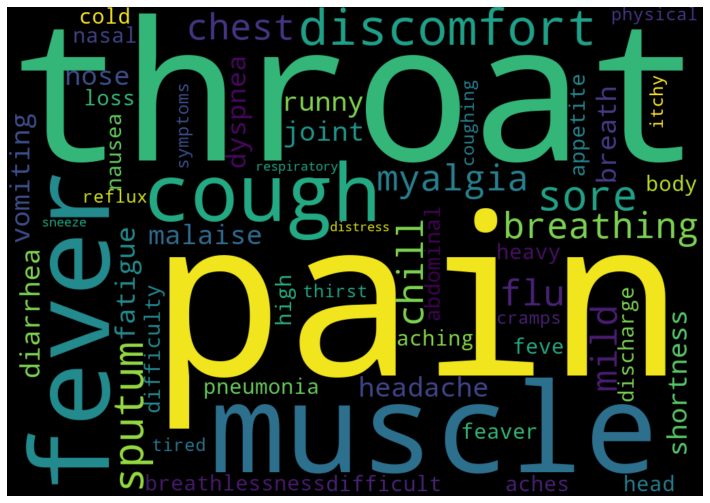

In [326]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def word_cloud(words):
    wordcloud = WordCloud(background_color='black', width = 1024, height=720).generate(words)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plt.figure(figsize=(15,9))
word_cloud(' '.join(major_symptoms.index.tolist()))

Here size of a word indicate how often it has occurend while describing symptoms

<h2><b>COVID-19 Tests Analysis</b><h2>

In [327]:
us_tests_df = pd.read_csv("https://raw.githubusercontent.com/COVID19Tracking/covid-tracking-data/master/data/us_daily.csv")
us_tests_df["date"] = pd.to_datetime(us_tests_df["date"], format="%Y%m%d")
us_tests_df.head(2)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-28,56,1005592,4790136.0,4206.0,54940.0,106308.0,9491.0,3798.0,4760.0,195.0,139342.0,450cb4b3e77554d31ab459dccdb836f3fa5d2344,2020-04-28T20:00:00Z,52525.0,106308.0,5799934,5795728,5795728,2198.0,2059.0,177775.0,24458.0,202233.0
1,2020-04-27,56,981134,4612361.0,4077.0,54971.0,104249.0,9655.0,3720.0,4867.0,195.0,121609.0,a43f1993e823ebc4a491bb82a3bf8ba9445b403f,2020-04-27T20:00:00Z,50327.0,104249.0,5597572,5593495,5593495,1163.0,3016.0,168567.0,21876.0,190443.0


In [328]:
fig = px.bar(us_tests_df, x="date", y="total")

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative number of Total COVID-19 testing over time in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of covid-19 testings"
)

fig.update_layout(layout)
fig.show()

In [329]:
us_tests_statewise_df = pd.read_csv("https://raw.githubusercontent.com/COVID19Tracking/covid-tracking-data/master/data/states_daily_4pm_et.csv")
us_tests_statewise_df = us_tests_statewise_df.reindex(index=us_tests_statewise_df.index[::-1])
us_tests_statewise_df["date"] = pd.to_datetime(us_tests_statewise_df["date"], format="%Y%m%d")
us_tests_statewise_df["state"] = us_tests_statewise_df["state"].apply(correct_state_names)
us_tests_statewise_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
3040,2020-01-22,Washington,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299b5b62b4d05b5d61eba3e3730bb17d025ceb75,2020-01-22T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,NaN,NaN,NaN,NaN,NaN
3039,2020-01-23,Washington,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,faa0d0b985f479eac50082e417dc84f9e645db8f,2020-01-23T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3038,2020-01-24,Washington,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4763cdf13300976ba41317d7c7767e1c558a1134,2020-01-24T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3037,2020-01-25,Washington,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f17fc4cde1b2e7b57e946752d620e48d7f02c7ce,2020-01-25T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3036,2020-01-26,Washington,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405aae8b4155c77878ab1e2a85f32d7bb7a45c9a,2020-01-26T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-04-28,Arizona,6948.0,60490.0,NaN,737.0,1095.0,303.0,NaN,193.0,NaN,1450.0,794b840cd5db415c34fde311f79479b9e3b3df36,2020-04-28T20:00:00Z,293.0,1095.0,67438.0,67438.0,67438.0,4,18.0,44.0,663.0,232.0,895.0
3,2020-04-28,American Samoa,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cb1dd833c2e825a207b819e419821f0f66cf61ed,2020-04-28T20:00:00Z,0.0,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
2,2020-04-28,Arkansas,3111.0,37560.0,NaN,104.0,NaN,NaN,NaN,20.0,NaN,1146.0,6310b3c9131a8d988038f31a216d268bce711cb5,2020-04-28T20:00:00Z,52.0,NaN,40671.0,40671.0,40671.0,5,2.0,0.0,120.0,94.0,214.0
1,2020-04-28,Alabama,6687.0,69140.0,NaN,NaN,911.0,NaN,335.0,NaN,195.0,NaN,ba9dbab92f047c4b4b3e3857de416e7cb174b05e,2020-04-28T20:00:00Z,242.0,911.0,75827.0,75827.0,75827.0,1,20.0,39.0,1642.0,188.0,1830.0


In [330]:
import plotly.express as px

us_tests_statewise_df["positive"] = us_tests_statewise_df["positive"].fillna(0)
us_tests_statewise_df_line = us_tests_statewise_df[(us_tests_statewise_df['date'] > '2020-03-05')]

fig = px.line(us_tests_statewise_df_line, x="date", y="total",
           color="state", hover_name="state")

layout = go.Layout(
    title=go.layout.Title(
        text="Total testing counts per state",
        x=0.5
    ),
    font=dict(size=14),
    xaxis_title = "Date",
    yaxis_title = "Total tests"
)

fig.update_layout(layout)
fig.show()

In [331]:
import plotly.express as px

us_tests_statewise_df["date"] = us_tests_statewise_df["date"].dt.date.astype(str)
fig = px.scatter(us_tests_statewise_df, x="total", y="positive",
           size="positive", color="state", hover_name="state",
           log_x=False, size_max=35, range_x=[0,200000], range_y=[0,55000])

layout = go.Layout(
    title=go.layout.Title(
        text="Total testing counts Vs Positive Counts over time",
        x=0.5
    ),
    font=dict(size=14),
#     width=800,
#     height=500,
    xaxis_title = "Total number of tests",
    yaxis_title = "Number of positive tests"
)

fig.update_layout(layout)
fig.show()

We can observe that California is one of the leading states in performing tests and with the number of tests, the positive cases are not linearing increasing which is a good news! We believe the more the states tests, the better they will be at acessing the situation and make a better decision on when to reopen economy

<h2><b>References</b></h2>



*   https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons
* https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model#SIR-to-SIR-F
* https://www.kaggle.com/duttadebadri/covid-19-analysing-growth-sir-modeling-india
* https://www.kaggle.com/abhinand05/covid-19-digging-a-bit-deeper
* https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting#Prediction-using-Machine-Learning-Models
* https://www.kaggle.com/sudalairajkumar/covid-19-analysis-of-usa
* https://covidtracking.com/


Our sincere thanks to WHO and COVID Tracking Project for making the data available for public 
